# IMPORTING LIBRARIES

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# GETTING GHANA'S PRECISE COORDINATES

In [2]:
COORDS = [-3.25, 1.2, 4.5, 11.5]

# OPENING AND PROCESSING DATASET FOR PLOTTING

In [4]:
AA = xr.open_dataset('Africa_cru_data.nc')
select = AA.sel(time=slice('2000-01-01','2009-12-31'))
selected = select.sel(
    lon=slice(COORDS[0], COORDS[1]),
    lat=slice(COORDS[2], COORDS[3])
)
precipitation = selected['pre']

# USE THE .where() METHOD TO COUNT EVENTS > 250mm

In [6]:
precip_count = precipitation.where(precipitation > 250).groupby('time.year').count(dim='time')

# CREATE VISUALITIONS

C:\Users\Capable GOD\AppData\Local\Temp\ipykernel_11520\646419179.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


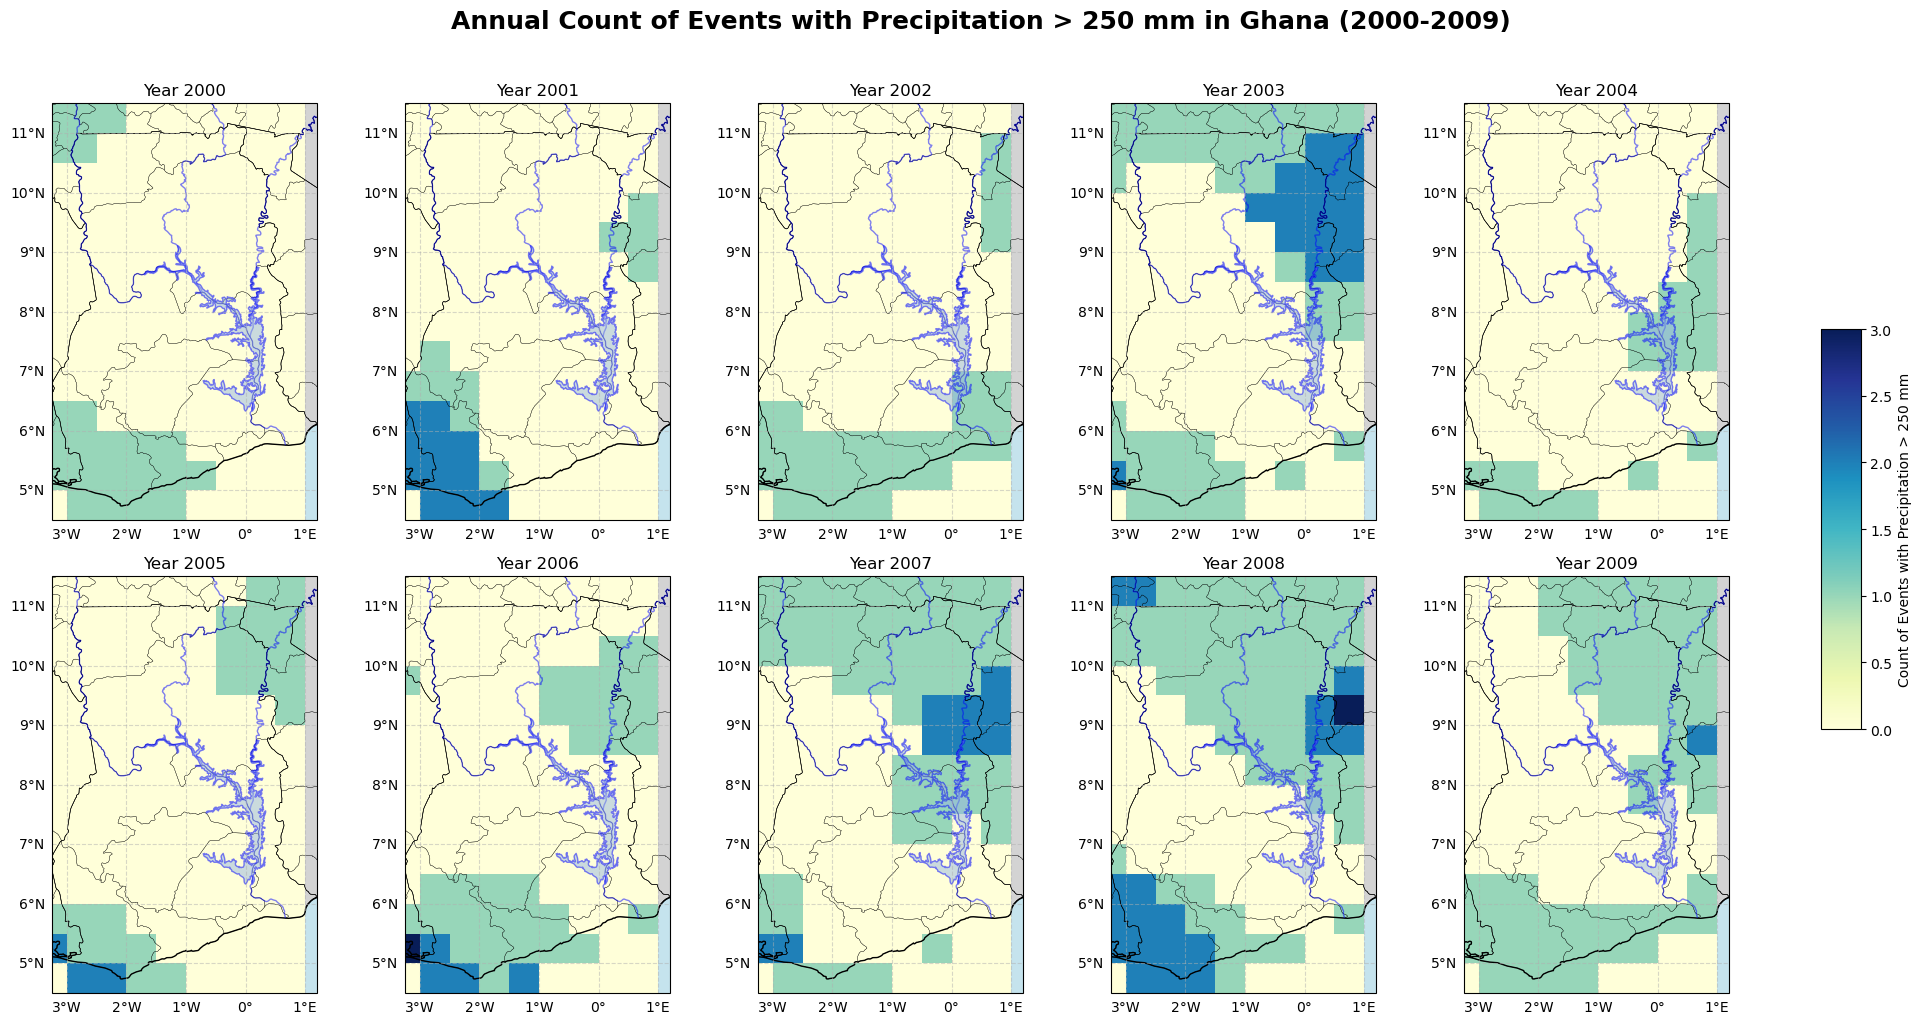

In [8]:
fig, axes = plt.subplots(2, 5, 
                          figsize=(20, 10), 
                          subplot_kw={'projection': ccrs.PlateCarree()})

# Flatten axes for easy iteration
axes_flat = axes.flat

# Store images for colorbar
images = []

# Years to plot
years = precip_count.year.values

for i, year in enumerate(years):
    ax = axes_flat[i]
    
    # Set extent specifically for Ghana
    ax.set_extent(COORDS, crs=ccrs.PlateCarree())
    
    # Plot data for specific year
    img = precip_count.sel(year=year).plot(
        ax=ax, 
        transform=ccrs.PlateCarree(),
        cmap='YlGnBu', 
        vmin=0, 
        vmax=precip_count.max().values,
        add_colorbar=False
    )
    
    # Store image for colorbar
    images.append(img)
    
    # Add geographic features
    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=0.5, edgecolor='black')
    ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
    ax.add_feature(cfeature.STATES, linestyle='-', linewidth=0.2, edgecolor='black')
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue', alpha=0.7)
    ax.add_feature(cfeature.RIVERS, edgecolor='blue', alpha=0.5)
    ax.add_feature(cfeature.LAKES, edgecolor='blue', alpha=0.5)
    
    # Gridlines
    gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5)
    gl.right_labels = False
    gl.top_labels = False
    
    # Add year title
    ax.set_title(f'Year {year}')

# Colorbar
cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
cbar = plt.colorbar(images[-1], cax=cbar_ax)
cbar.set_label('Count of Events with Precipitation > 250 mm')

# Overall figure title
fig.suptitle('Annual Count of Events with Precipitation > 250 mm in Ghana (2000-2009)', 
             fontsize=18, fontweight='bold', y=1.02)

# Layout
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

# DIAGNOSTIC PRINT

In [9]:
print("Yearly Precipitation Event Counts:")
for year in precip_count.year.values:
    print(f"Year {year}: {precip_count.sel(year=year).sum().values} events")

Yearly Precipitation Event Counts:
Year 2000: 22 events
Year 2001: 32 events
Year 2002: 30 events
Year 2003: 69 events
Year 2004: 20 events
Year 2005: 26 events
Year 2006: 42 events
Year 2007: 71 events
Year 2008: 94 events
Year 2009: 58 events


# ADDITIONAL DIAGNOSTIC FOR EASY UNDERSTANDING

In [11]:
print("\nDataset Details:")
print("Precipitation Range:", precipitation.min().values, "to", precipitation.max().values)
print("Total Precipitation Events > 250mm:", precip_count.sum().values)


Dataset Details:
Precipitation Range: 0.0 to 420.8000183105469
Total Precipitation Events > 250mm: 464
